In [2]:
import pandas as pd

In [3]:
model_df = pd.read_pickle('model_output.pkl')
joint_calendar_df = pd.read_pickle('joint_calendar.pkl')

In [8]:
# Reset indices
model_df = model_df.reset_index(drop=True)
joint_calendar_df = joint_calendar_df.reset_index(drop=True)

# Calculate total dollar sales for Brand A and Brand B and add them to the model_df
model_df['Total_Sales_A'] = model_df['Total_Purchases_A'] * joint_calendar_df[('A', 'price')]
model_df['Total_Sales_B'] = model_df['Total_Purchases_B'] * joint_calendar_df[('B', 'price')]

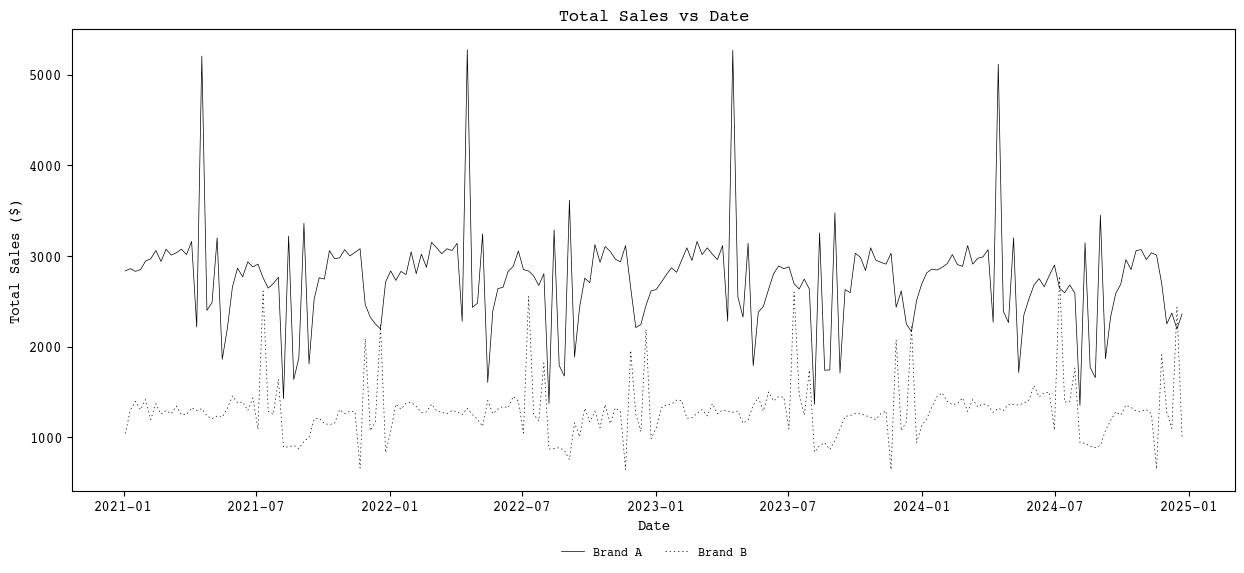

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Set the font to Courier
mpl.rcParams['font.family'] = 'Courier'

# Set the line weight to thin
mpl.rcParams['lines.linewidth'] = 0.5

# Set the color scheme to black and white
mpl.rcParams['text.color'] = 'black'
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'

# Create the plot
plt.figure(figsize=(15,6))

plt.plot(model_df['Date'], model_df['Total_Sales_A'], label='Brand A', color='black')
plt.plot(model_df['Date'], model_df['Total_Sales_B'], label='Brand B', color='black', linestyle='--', dashes=[2,4])

plt.title('Total Sales vs Date')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2, fontsize='small', frameon=False)

plt.show()

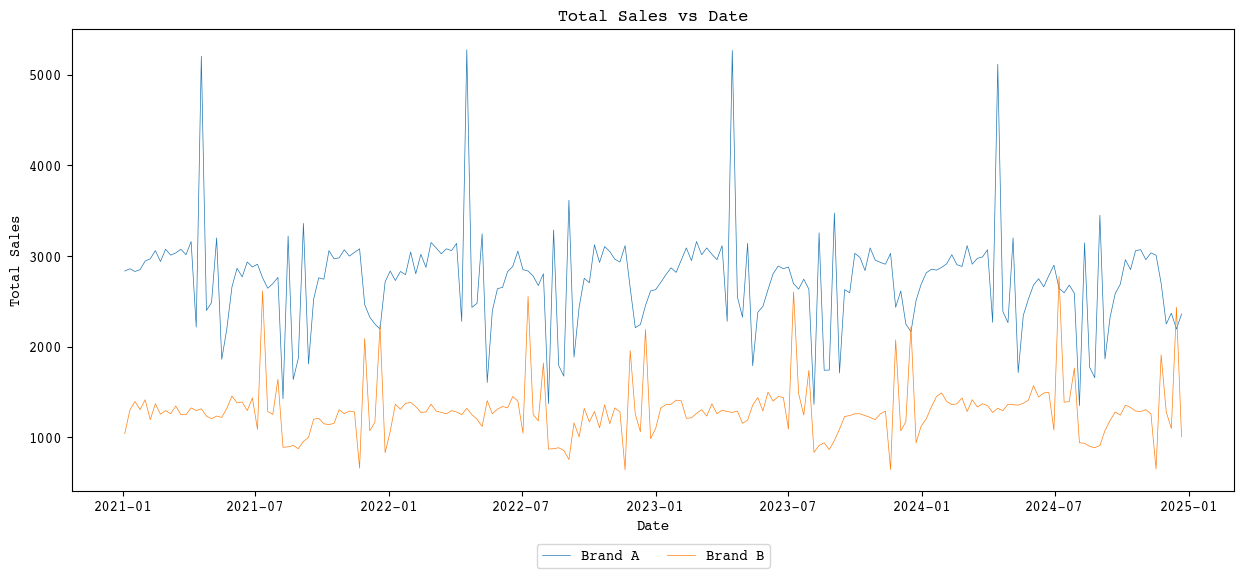

In [15]:
plt.figure(figsize=(15,6))
plt.plot(model_df['Date'], model_df['Total_Sales_A'], label='Brand A')
plt.plot(model_df['Date'], model_df['Total_Sales_B'], label='Brand B')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales vs Date')

# Place the legend below the x-axis label
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=2)

plt.show()